In [55]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sidetable
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_csv('../datos/Dataframe_filtrado_data.csv', index_col= 0)
df.sample()

,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion
13838,22-24,Man,Taiwan,Master’s degree,Data Analyst,1-3 years,A laptop,Accounting/Finance,250-999 employees,"3,000-3,999",NaN,"Python, R, SQL","RStudio ,Jupyter Notebook","Matplotlib ,Ggplot / ggplot2",Analyze and understand data to influence produ...,GitHub Kaggle


In [3]:
# Función con todas las propiedades para hacer una exploración inicial de los dataframes.
def df_exploracion(dataframe):
     """
     Esta función realiza una exploración del dataframe
     Args: dataframe (recibe un parámetro que es el dataframe a explorar).
     """
     print(f"Tamaño del DataFrame: {dataframe.size}")
     print("---------")
     print(f"(El número de filas y columnas del DataFrame: {dataframe.shape}")
     print("----------")
     print(f"Descripción estadística del DataFrame:")
     display(dataframe.describe())
     print("--------")
     print(f"Información general del DataFrame:")
     display(dataframe.info())
     print("--------")
     print(f"Las columnas de este DataFrame son {dataframe.columns}")
     print("----------")
     print(f"Tipo de dato de las columnas de este DataFrame:{dataframe.dtypes}")

In [4]:
df_exploracion(df)

Tamaño del DataFrame: 52304
---------
(El número de filas y columnas del DataFrame: (3269, 16)
----------
Descripción estadística del DataFrame:


,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion
count,3269,3269,3269,3269,3269,3269,2980,3111,3092,2924,807,2994,2991,2924,2971,1659
unique,11,5,66,7,2,7,6,18,5,26,20,250,474,208,73,90
top,25-29,Man,India,Master’s degree,Data Analyst,1-3 years,A laptop,Computers/Technology,0-49 employees,$0-999,MySQL,"Python, SQL",Jupyter Notebook,"Matplotlib ,Seaborn",Analyze and understand data to influence produ...,I do not share my work publicly
freq,788,2538,795,1514,2301,991,2082,550,908,679,206,622,377,602,1117,610


--------
Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 16 to 25972
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      3269 non-null   object
 1   gender                   3269 non-null   object
 2   paises                   3269 non-null   object
 3   titulo_academico         3269 non-null   object
 4   puesto_trabajo           3269 non-null   object
 5   años_experiencia         3269 non-null   object
 6   plataforma_informatica   2980 non-null   object
 7   sector_laboral           3111 non-null   object
 8   tamaño_empresa           3092 non-null   object
 9   salario                  2924 non-null   object
 10  servidor_datos           807 non-null    object
 11  lenguaje_programacion    2994 non-null   object
 12  entorno_desarrollo       2991 non-null   object
 13  libreria_visualizacion   2924 non-null   object

None

--------
Las columnas de este DataFrame son Index(['age', 'gender', 'paises', 'titulo_academico', 'puesto_trabajo',
       'años_experiencia', 'plataforma_informatica', 'sector_laboral',
       'tamaño_empresa', 'salario', 'servidor_datos', 'lenguaje_programacion',
       'entorno_desarrollo', 'libreria_visualizacion', 'funciones_puesto',
       'herramienta_publicacion'],
      dtype='object')
----------
Tipo de dato de las columnas de este DataFrame:age                        object
gender                     object
paises                     object
titulo_academico           object
puesto_trabajo             object
años_experiencia           object
plataforma_informatica     object
sector_laboral             object
tamaño_empresa             object
salario                    object
servidor_datos             object
lenguaje_programacion      object
entorno_desarrollo         object
libreria_visualizacion     object
funciones_puesto           object
herramienta_publicacion    object


Antes de categorizar imputamos los valores nulos de salario:

In [5]:
columnas = ["age", "gender", "puesto_trabajo", "tamaño_empresa", "salario", "lenguaje_programacion"]

In [6]:
for col in columnas:
    df[col].replace(np.nan, "No sabe/No contesta", inplace = True)

In [7]:
df.isnull().sum()

age                           0
gender                        0
paises                        0
titulo_academico              0
puesto_trabajo                0
años_experiencia              0
plataforma_informatica      289
sector_laboral              158
tamaño_empresa                0
salario                       0
servidor_datos             2462
lenguaje_programacion         0
entorno_desarrollo          278
libreria_visualizacion      345
funciones_puesto            298
herramienta_publicacion    1610
dtype: int64

Vamos a categorizar columnas:

In [8]:
categoria_sueldo = df["salario"].unique()

In [9]:
df["salario"].replace(r",", ".",regex = True, inplace= True)

In [10]:
df["salario"].unique()

array(['2.000-2.999', 'No sabe/No contesta', '7.500-9.999', '$0-999',
       '25.000-29.999', '60.000-69.999', '20.000-24.999', '1.000-1.999',
       '100.000-124.999', '125.000-149.999', '5.000-7.499',
       '70.000-79.999', '10.000-14.999', '30.000-39.999', '15.000-19.999',
       '3.000-3.999', '4.000-4.999', '40.000-49.999', '200.000-249.999',
       '80.000-89.999', '50.000-59.999', '150.000-199.999',
       '90.000-99.999', '250.000-299.999', '>$1.000.000',
       '300.000-499.999', '$500.000-999.999'], dtype=object)

In [11]:
df["salario"].value_counts()

$0-999                 679
No sabe/No contesta    345
1.000-1.999            243
10.000-14.999          207
5.000-7.499            158
7.500-9.999            140
30.000-39.999          135
40.000-49.999          125
50.000-59.999          119
2.000-2.999            117
15.000-19.999          116
20.000-24.999          113
60.000-69.999          109
100.000-124.999        108
4.000-4.999            102
70.000-79.999           92
3.000-3.999             91
25.000-29.999           83
80.000-89.999           68
90.000-99.999           46
125.000-149.999         32
150.000-199.999         17
200.000-249.999          9
>$1.000.000              6
250.000-299.999          5
300.000-499.999          3
$500.000-999.999         1
Name: salario, dtype: int64

In [12]:
salario_junior = ['0-999', '1.000-1.999', '10.000-14.999',
        '5.000-7.499', '2.000-2.999', '7.500-9.999','4.000-4.999', '3.000-3.999'
    ]

In [13]:
salario_mid = [ '30.000-39.999', '20.000-24.999', 
        '15.000-19.999',  '25.000-29.999', 
    ]

In [14]:
salario_senior = [ '100.000-124.999','50.000-59.999', '40.000-49.999','60.000-69.999', '70.000-79.999',
        '150.000-199.999', '80.000-89.999', '125.000-149.999',
        '90.000-99.999', '200.000-249.999', '300.000-499.999', '250.000-299.999',
        '>$1.000.000', '$500.000-999.999'
    ]

In [15]:
df["salario"].unique()

array(['2.000-2.999', 'No sabe/No contesta', '7.500-9.999', '$0-999',
       '25.000-29.999', '60.000-69.999', '20.000-24.999', '1.000-1.999',
       '100.000-124.999', '125.000-149.999', '5.000-7.499',
       '70.000-79.999', '10.000-14.999', '30.000-39.999', '15.000-19.999',
       '3.000-3.999', '4.000-4.999', '40.000-49.999', '200.000-249.999',
       '80.000-89.999', '50.000-59.999', '150.000-199.999',
       '90.000-99.999', '250.000-299.999', '>$1.000.000',
       '300.000-499.999', '$500.000-999.999'], dtype=object)

In [16]:
def cat_salarios(salario):
    dicti = {"bajo": salario_junior, "medio": salario_mid, "alto": salario_senior}
    resultado = "No sabe/No contesta" 

    for k, v in dicti.items():
        if salario in v:
            resultado = k
            
    return resultado

In [17]:
df["salarios_cat"] = df["salario"].apply(cat_salarios)


In [18]:
df.head()

,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion,salarios_cat
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,A laptop,Energy/Mining,"1000-9,999 employees",2.000-2.999,NaN,"Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,bajo
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Manufacturing/Fabrication,250-999 employees,No sabe/No contesta,NaN,R,RStudio,Ggplot / ggplot2,NaN,NaN,No sabe/No contesta
33,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,A laptop,Non-profit/Service,0-49 employees,7.500-9.999,NaN,Python,"Notepad++,Jupyter Notebook",None,Analyze and understand data to influence produ...,I do not share my work publicly,bajo
46,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Computers/Technology,0-49 employees,$0-999,NaN,"Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,No sabe/No contesta
52,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,A laptop,Manufacturing/Fabrication,250-999 employees,25.000-29.999,NaN,"R, SQL","RStudio ,Jupyter Notebook","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny",Analyze and understand data to influence produ...,I do not share my work publicly,medio


In [19]:
df["salarios_cat"].unique()

array(['bajo', 'No sabe/No contesta', 'medio', 'alto'], dtype=object)

In [20]:
df["tamaño_empresa"].unique()

array(['1000-9,999 employees', '250-999 employees', '0-49 employees',
       '50-249 employees', '10,000 or more employees',
       'No sabe/No contesta'], dtype=object)

In [21]:
df["tamaño_empresa"].value_counts()

0-49 employees              908
10,000 or more employees    693
1000-9,999 employees        589
50-249 employees            495
250-999 employees           407
No sabe/No contesta         177
Name: tamaño_empresa, dtype: int64

In [22]:
def cat_empresa(tamaño_empresa):
    if tamaño_empresa ==  "0-49 employees":
        return "Startup"
    elif tamaño_empresa ==  "50-249 employees":
        return "Pequeña"
    elif tamaño_empresa ==  "250-999 employees":
        return "Mediana"
    elif tamaño_empresa ==  "1000-9,999 employees":
        return "Grande"
    elif tamaño_empresa ==  "10,000 or more employees":
        return "Multinacional"
    elif tamaño_empresa == "No sabe/No contesta":
        return "No sabe/No contesta"
  

In [23]:
df["empresa_cat"] = df["tamaño_empresa"].apply(cat_empresa)

In [24]:
df["empresa_cat"].replace("None", "No sabe/No contesta", inplace= True)

In [25]:

df["empresa_cat"].unique()

array(['Grande', 'Mediana', 'Startup', 'Pequeña', 'Multinacional',
       'No sabe/No contesta'], dtype=object)

In [26]:
df.head(10)

,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion,salarios_cat,empresa_cat
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,A laptop,Energy/Mining,"1000-9,999 employees",2.000-2.999,NaN,"Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,bajo,Grande
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Manufacturing/Fabrication,250-999 employees,No sabe/No contesta,NaN,R,RStudio,Ggplot / ggplot2,NaN,NaN,No sabe/No contesta,Mediana
33,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,A laptop,Non-profit/Service,0-49 employees,7.500-9.999,NaN,Python,"Notepad++,Jupyter Notebook",None,Analyze and understand data to influence produ...,I do not share my work publicly,bajo,Startup
46,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Computers/Technology,0-49 employees,$0-999,NaN,"Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,No sabe/No contesta,Startup
52,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,A laptop,Manufacturing/Fabrication,250-999 employees,25.000-29.999,NaN,"R, SQL","RStudio ,Jupyter Notebook","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny",Analyze and understand data to influence produ...,I do not share my work publicly,medio,Mediana
53,40-44,Man,Other,Master’s degree,Business Analyst,1-3 years,A laptop,Accounting/Finance,50-249 employees,60.000-69.999,NaN,"Python, SQL, Other","PyCharm , Other",Matplotlib,None of these activities are an important par...,Colab,alto,Pequeña
66,30-34,Prefer not to say,China,I prefer not to answer,Data Analyst,< 1 years,A laptop,Computers/Technology,0-49 employees,$0-999,NaN,Python,"PyCharm , Spyder",None,Analyze and understand data to influence produ...,NaN,No sabe/No contesta,Startup
67,30-34,Man,Other,Master’s degree,Business Analyst,1-3 years,A personal computer / desktop,Online Service/Internet-based Services,"1000-9,999 employees",7.500-9.999,NaN,Python,"Spyder,Jupyter Notebook","Matplotlib ,Seaborn",Analyze and understand data to influence produ...,GitHub,bajo,Grande
77,22-24,Man,China,Master’s degree,Business Analyst,< 1 years,A laptop,Accounting/Finance,"1000-9,999 employees",20.000-24.999,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express ...",Analyze and understand data to influence produ...,GitHub Kaggle,medio,Grande
82,30-34,Man,India,Master’s degree,Business Analyst,1-3 years,A laptop,Computers/Technology,"10,000 or more employees",20.000-24.999,NaN,Python,"Visual Studio Code (VSCode) , Sublime Text,Jup...",None,Analyze and understand data to influence produ...,GitHub Kaggle,medio,Multinacional


Tratamiento nulos:

In [27]:
df.isnull().sum()*100 / df.shape[0]

age                         0.000000
gender                      0.000000
paises                      0.000000
titulo_academico            0.000000
puesto_trabajo              0.000000
años_experiencia            0.000000
plataforma_informatica      8.840624
sector_laboral              4.833282
tamaño_empresa              0.000000
salario                     0.000000
servidor_datos             75.313552
lenguaje_programacion       0.000000
entorno_desarrollo          8.504130
libreria_visualizacion     10.553686
funciones_puesto            9.115938
herramienta_publicacion    49.250535
salarios_cat                0.000000
empresa_cat                 0.000000
dtype: float64

In [28]:
df["lenguaje_programacion"].unique()

array(['Python, SQL', ' R', 'Python',
       'Python, SQL, C, C++, Java, Javascript, MATLAB', ' R, SQL',
       'Python, SQL, Other', ' SQL, C++', ' R, SQL, C++', ' SQL',
       'Python, SQL, Javascript', 'Python, SQL, C, Javascript',
       'No sabe/No contesta', 'Python, SQL, C++, Other', 'Python, R, SQL',
       'Python, R, SQL, C, C++', 'Python, R', ' C++', 'Python, R, Other',
       ' None', 'Python, SQL, Java, Javascript', 'Python, R, MATLAB',
       'Python, R, SQL, C++, MATLAB', 'Python, SQL, C++',
       'Python, SQL, Javascript, Other', 'Python, R, SQL, MATLAB',
       'Python, SQL, MATLAB', 'Python, R, C, C++', 'Python, Javascript',
       'Python, SQL, Javascript, Bash', ' C, C++, MATLAB', 'Python, Java',
       ' SQL, Java', 'Python, R, SQL, Other',
       'Python, SQL, C++, Javascript, Bash', 'Python, C++, Java, MATLAB',
       'Python, Javascript, Other', 'Python, R, SQL, Javascript',
       'Python, C', 'Python, R, SQL, C, C++, Java',
       'Python, R, SQL, Java, Javas

In [29]:
df_lenguajes = pd.DataFrame(df["lenguaje_programacion"].value_counts())
df_lenguajes.head()

,lenguaje_programacion
"Python, SQL",622
Python,481
"Python, R, SQL",319
No sabe/No contesta,275
"Python, R",140


In [30]:
# Creamos una funcion que dividirá los strings de la columna lenguajes_programacion
def split_string(lenguajes):
    try:
        return [lenguaje.strip() for lenguaje in lenguajes.split(',')]
    except:
        return ["sin responder"]

In [31]:
df["lenguaje_programacion"].unique()

array(['Python, SQL', ' R', 'Python',
       'Python, SQL, C, C++, Java, Javascript, MATLAB', ' R, SQL',
       'Python, SQL, Other', ' SQL, C++', ' R, SQL, C++', ' SQL',
       'Python, SQL, Javascript', 'Python, SQL, C, Javascript',
       'No sabe/No contesta', 'Python, SQL, C++, Other', 'Python, R, SQL',
       'Python, R, SQL, C, C++', 'Python, R', ' C++', 'Python, R, Other',
       ' None', 'Python, SQL, Java, Javascript', 'Python, R, MATLAB',
       'Python, R, SQL, C++, MATLAB', 'Python, SQL, C++',
       'Python, SQL, Javascript, Other', 'Python, R, SQL, MATLAB',
       'Python, SQL, MATLAB', 'Python, R, C, C++', 'Python, Javascript',
       'Python, SQL, Javascript, Bash', ' C, C++, MATLAB', 'Python, Java',
       ' SQL, Java', 'Python, R, SQL, Other',
       'Python, SQL, C++, Javascript, Bash', 'Python, C++, Java, MATLAB',
       'Python, Javascript, Other', 'Python, R, SQL, Javascript',
       'Python, C', 'Python, R, SQL, C, C++, Java',
       'Python, R, SQL, Java, Javas

In [32]:
df["lenguaje_programacion"].value_counts()

Python, SQL                                        622
Python                                             481
Python, R, SQL                                     319
No sabe/No contesta                                275
Python, R                                          140
                                                  ... 
Python, R, SQL, C, C++, Java, Javascript, Other      1
Python, R, Javascript, Bash                          1
Python, C, C++, Java, Other                          1
Python, R, SQL, Swift                                1
Python, R, SQL, Java, Javascript, Other              1
Name: lenguaje_programacion, Length: 251, dtype: int64

In [33]:
# Aplicamos la función para crear una nueva columna llamada 'lenguajes separados'
#En esta nueva columna pasamos de tener un único string a tener una lista de strings
df['lenguajes_separados'] = df['lenguaje_programacion'].apply(split_string)
df.head()

,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion,salarios_cat,empresa_cat,lenguajes_separados
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,A laptop,Energy/Mining,"1000-9,999 employees",2.000-2.999,NaN,"Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,bajo,Grande,"[Python, SQL]"
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Manufacturing/Fabrication,250-999 employees,No sabe/No contesta,NaN,R,RStudio,Ggplot / ggplot2,NaN,NaN,No sabe/No contesta,Mediana,[R]
33,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,A laptop,Non-profit/Service,0-49 employees,7.500-9.999,NaN,Python,"Notepad++,Jupyter Notebook",None,Analyze and understand data to influence produ...,I do not share my work publicly,bajo,Startup,[Python]
46,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Computers/Technology,0-49 employees,$0-999,NaN,"Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,No sabe/No contesta,Startup,"[Python, SQL, C, C++, Java, Javascript, MATLAB]"
52,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,A laptop,Manufacturing/Fabrication,250-999 employees,25.000-29.999,NaN,"R, SQL","RStudio ,Jupyter Notebook","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny",Analyze and understand data to influence produ...,I do not share my work publicly,medio,Mediana,"[R, SQL]"


In [34]:
# Contamos la frecuencia de cada lenguaje
#Creamos un diccionario en el que tendremos el conteo

conteo_lenguajes = {}
for lenguajes in df['lenguajes_separados']:
    
    
        for lenguaje in lenguajes:
            if lenguaje in conteo_lenguajes:
                conteo_lenguajes[lenguaje] += 1
            else:
                conteo_lenguajes[lenguaje] = 1
print(conteo_lenguajes)

{'Python': 2465, 'SQL': 1866, 'R': 928, 'C': 240, 'C++': 288, 'Java': 300, 'Javascript': 327, 'MATLAB': 230, 'Other': 300, 'No sabe/No contesta': 275, 'None': 59, 'Bash': 131, 'Julia': 21, 'Swift': 20}


In [35]:
df_conteo_lenguajes = pd.DataFrame(conteo_lenguajes, index = [0]) 
df_conteo_lenguajes 

,Python,SQL,R,C,C++,Java,Javascript,MATLAB,Other,No sabe/No contesta,None,Bash,Julia,Swift
0,2465,1866,928,240,288,300,327,230,300,275,59,131,21,20


In [36]:
df_conteo_lenguajes.sum().sort_values(ascending = False).iloc[:10].reset_index()

,index,0
0,Python,2465
1,SQL,1866
2,R,928
3,Javascript,327
4,Java,300
5,Other,300
6,C++,288
7,No sabe/No contesta,275
8,C,240
9,MATLAB,230


In [37]:
df.select_dtypes

<bound method DataFrame.select_dtypes of          age     gender                    paises  \
16     50-54        Man                   Belgium   
32     22-24  Nonbinary  United States of America   
33     30-34      Woman                     Egypt   
46     22-24        Man                     China   
52     40-44        Man              South Africa   
...      ...        ...                       ...   
25959  18-21        Man                     India   
25965  18-21        Man                     India   
25966  30-34        Man                     India   
25968  30-34        Man                     Egypt   
25972  18-21        Man                     India   

                                        titulo_academico    puesto_trabajo  \
16                                     Bachelor’s degree      Data Analyst   
32     Some college/university study without earning ...      Data Analyst   
33                                     Bachelor’s degree      Data Analyst   
46     Som

In [38]:
df["servidor_datos"].unique()

array([nan, 'Oracle Database ', 'IBM Db2 ', 'Snowflake ', 'PostgreSQL ',
       'Google Cloud BigQuery ', 'Microsoft Azure SQL Database ',
       'SQLite ', 'Microsoft SQL Server ', 'MySQL ', 'MongoDB ',
       'Google Cloud SQL ', 'Amazon Redshift ', 'Amazon DynamoDB ',
       'Google Cloud Spanner ', 'Google Cloud BigTable ', 'Other',
       'Microsoft Azure Cosmos DB ', 'Google Cloud Firestore ',
       'Amazon RDS ', 'Amazon Aurora '], dtype=object)

In [39]:
df["age"].unique()

array(['50-54', '22-24', '30-34', '40-44', '70+', '45-49', '18-21',
       '55-59', '25-29', '35-39', '60-69'], dtype=object)

In [40]:
def cat_edad(age):
    
    try:
        if age in  ["18-21","22-24", "25-29"]:
            return "18-29"
        elif age in  ["30-34", '35-39', '40-44'] :
            return "30-44"
        elif age in  ["45-49", '50-54','55-59'] :
            return "45-59"
        elif age in  ["60-69", '70+']:
            return "60-70+"
        
    except:
        return age

In [41]:
df['edades'] = df['age'].apply(cat_edad)
df.head()

,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion,salarios_cat,empresa_cat,lenguajes_separados,edades
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,A laptop,Energy/Mining,"1000-9,999 employees",2.000-2.999,NaN,"Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,bajo,Grande,"[Python, SQL]",45-59
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Manufacturing/Fabrication,250-999 employees,No sabe/No contesta,NaN,R,RStudio,Ggplot / ggplot2,NaN,NaN,No sabe/No contesta,Mediana,[R],18-29
33,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,A laptop,Non-profit/Service,0-49 employees,7.500-9.999,NaN,Python,"Notepad++,Jupyter Notebook",None,Analyze and understand data to influence produ...,I do not share my work publicly,bajo,Startup,[Python],30-44
46,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Computers/Technology,0-49 employees,$0-999,NaN,"Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,No sabe/No contesta,Startup,"[Python, SQL, C, C++, Java, Javascript, MATLAB]",18-29
52,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,A laptop,Manufacturing/Fabrication,250-999 employees,25.000-29.999,NaN,"R, SQL","RStudio ,Jupyter Notebook","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny",Analyze and understand data to influence produ...,I do not share my work publicly,medio,Mediana,"[R, SQL]",30-44


In [42]:
df["edades"].unique()

array(['45-59', '18-29', '30-44', '60-70+'], dtype=object)

In [43]:
df["paises"].unique()

array(['Belgium', 'United States of America', 'Egypt', 'China',
       'South Africa', 'Other', 'India', 'Israel', 'Colombia', 'Austria',
       'Brazil', 'Japan', 'Russia', 'Ukraine', 'Pakistan', 'Canada',
       'Nigeria', 'Mexico', 'Tunisia', 'Italy', 'Poland', 'Spain',
       'Indonesia', 'Sri Lanka',
       'United Kingdom of Great Britain and Northern Ireland', 'Turkey',
       'Kenya', 'Iran, Islamic Republic of...', 'South Korea', 'Peru',
       'Viet Nam', 'United Arab Emirates', 'Germany', 'France', 'Greece',
       'Taiwan', 'Portugal', 'Australia', 'Philippines', 'Saudi Arabia',
       'Singapore', 'Chile', 'Netherlands', 'Argentina', 'Ghana',
       'Morocco', 'Thailand', 'Switzerland', 'Hong Kong (S.A.R.)',
       'Ecuador', 'Bangladesh', 'Malaysia', 'Romania', 'Norway',
       'Ethiopia', 'Czech Republic',
       'I do not wish to disclose my location', 'Ireland', 'Sweden',
       'Kazakhstan', 'Iraq', 'Algeria', 'Denmark', 'Uganda', 'Belarus',
       'Nepal'], dtype=obj

In [44]:
df_top5_paises = pd.DataFrame(df["paises"].value_counts()).iloc[:10]
df_top5_paises 

,paises
India,795
United States of America,367
Other,181
Nigeria,132
China,121
Brazil,110
Russia,108
Egypt,101
Japan,84
United Kingdom of Great Britain and Northern Ireland,77


In [45]:
df_españa = df[(df["paises"] == "Spain")]
df_españa.head()

,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion,salarios_cat,empresa_cat,lenguajes_separados,edades
396,50-54,Man,Spain,Bachelor’s degree,Data Analyst,1-3 years,A personal computer / desktop,Online Service/Internet-based Services,50-249 employees,60.000-69.999,Google Cloud BigQuery,R,RStudio,Ggplot / ggplot2,Analyze and understand data to influence produ...,GitHub,alto,Pequeña,[R],45-59
1385,45-49,Man,Spain,Bachelor’s degree,Data Analyst,5-10 years,"A deep learning workstation (NVIDIA GTX, Lambd...",Government/Public Service,"1000-9,999 employees",60.000-69.999,NaN,"Python, SQL, Bash","Notepad++,Jupyter Notebook","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,alto,Grande,"[Python, SQL, Bash]",45-59
1961,25-29,Man,Spain,Some college/university study without earning ...,Data Analyst,3-5 years,A laptop,Retail/Sales,250-999 employees,25.000-29.999,Microsoft Azure SQL Database,"Python, SQL",PyCharm,"Plotly / Plotly Express ,Shiny",Analyze and understand data to influence produ...,I do not share my work publicly,medio,Mediana,"[Python, SQL]",18-29
2902,40-44,Man,Spain,Master’s degree,Data Analyst,10-20 years,A laptop,Accounting/Finance,250-999 employees,20.000-24.999,Microsoft SQL Server,"Python, R, SQL","RStudio , Spyder,Jupyter Notebook","Matplotlib ,Seaborn ,Plotly / Plotly Express ...",Analyze and understand data to influence produ...,GitHub,medio,Mediana,"[Python, R, SQL]",30-44
3422,25-29,Woman,Spain,Bachelor’s degree,Data Analyst,1-3 years,A personal computer / desktop,Medical/Pharmaceutical,"1000-9,999 employees",40.000-49.999,PostgreSQL,SQL,"Visual Studio Code (VSCode) ,PyCharm",None,Analyze and understand data to influence produ...,I do not share my work publicly,alto,Grande,[SQL],18-29


In [46]:
df.isnull().sum()*100 / df.shape[0]

age                         0.000000
gender                      0.000000
paises                      0.000000
titulo_academico            0.000000
puesto_trabajo              0.000000
años_experiencia            0.000000
plataforma_informatica      8.840624
sector_laboral              4.833282
tamaño_empresa              0.000000
salario                     0.000000
servidor_datos             75.313552
lenguaje_programacion       0.000000
entorno_desarrollo          8.504130
libreria_visualizacion     10.553686
funciones_puesto            9.115938
herramienta_publicacion    49.250535
salarios_cat                0.000000
empresa_cat                 0.000000
lenguajes_separados         0.000000
edades                      0.000000
dtype: float64

In [47]:
df.stb.missing()

,missing,total,percent
servidor_datos,2462,3269,75.313552
herramienta_publicacion,1610,3269,49.250535
libreria_visualizacion,345,3269,10.553686
funciones_puesto,298,3269,9.115938
plataforma_informatica,289,3269,8.840624
entorno_desarrollo,278,3269,8.504130
sector_laboral,158,3269,4.833282
lenguaje_programacion,0,3269,0.000000
lenguajes_separados,0,3269,0.000000
empresa_cat,0,3269,0.000000


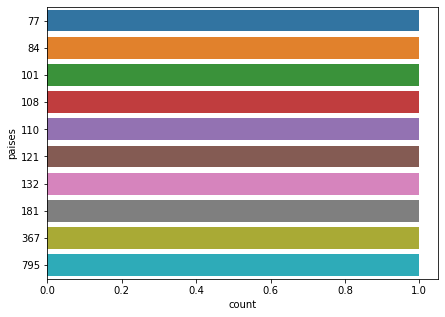

In [48]:
plt.figure(figsize=(7,5))

fig = sns.countplot(y = 'paises', data = df_top5_paises)

In [49]:
df.head()

,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion,salarios_cat,empresa_cat,lenguajes_separados,edades
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,A laptop,Energy/Mining,"1000-9,999 employees",2.000-2.999,NaN,"Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,bajo,Grande,"[Python, SQL]",45-59
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Manufacturing/Fabrication,250-999 employees,No sabe/No contesta,NaN,R,RStudio,Ggplot / ggplot2,NaN,NaN,No sabe/No contesta,Mediana,[R],18-29
33,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,A laptop,Non-profit/Service,0-49 employees,7.500-9.999,NaN,Python,"Notepad++,Jupyter Notebook",None,Analyze and understand data to influence produ...,I do not share my work publicly,bajo,Startup,[Python],30-44
46,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Computers/Technology,0-49 employees,$0-999,NaN,"Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,No sabe/No contesta,Startup,"[Python, SQL, C, C++, Java, Javascript, MATLAB]",18-29
52,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,A laptop,Manufacturing/Fabrication,250-999 employees,25.000-29.999,NaN,"R, SQL","RStudio ,Jupyter Notebook","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny",Analyze and understand data to influence produ...,I do not share my work publicly,medio,Mediana,"[R, SQL]",30-44


In [54]:

df_final = df.drop(["tamaño_empresa", "salario", "lenguaje_programacion", "age"], axis = 1, inplace = True )
df_final.head()

KeyError: "['tamaño_empresa' 'salario' 'lenguaje_programacion' 'age'] not found in axis"